In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

sns.set_theme()

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# population random variable
rho = -0.3
rv = multivariate_normal(
    [10.0, -3.0], 
    [
        [1.0, rho], 
        [rho, 1.0]
    ]
)

In [4]:
num_cal_draws = 1_000
cal_draws = rv.rvs(num_cal_draws)
cal_X, cal_theta = cal_draws[:,0], cal_draws[:,1]

In [5]:
num_test_draws = 1_000
test_draws = rv.rvs(num_test_draws)
test_X, test_theta = test_draws[:,0], test_draws[:,1]

In [6]:
def ci_len(phi):
    alpha = 0.05
    var_scores = 1 / norm.pdf(cal_theta, loc=phi * cal_X, scale=1 - rho ** 2)
    q_hat = np.quantile(var_scores, q = 1 - alpha)

    # can do grid naively for this simple case (wouldn't work in real cases but fine for toy)
    discretization = 0.1
    theta_grid = np.tile(np.arange(-10, 10, discretization), (num_test_draws, 1))
    test_X_grid = np.tile(test_X, (theta_grid.shape[1], 1)).T
    grid_scores = 1 / norm.pdf(theta_grid, loc=phi * test_X_grid, scale=1 - rho ** 2)

    # hacky solution to vectorize this computation, but hey, I like it
    theta_grid[grid_scores < q_hat] = discretization
    theta_grid[grid_scores > q_hat] = 0
    interval_lengths = np.sum(theta_grid, axis=1)
    return np.mean(interval_lengths)

In [7]:
def theory_len(phi):
    return 2 * np.sqrt(phi ** 2 + 1 - 2 * phi * rho) * 1.96

In [8]:
phis = np.arange(-1, 1, 0.01)
ci_lens = np.array([ci_len(phi) for phi in phis])
theory_lens = np.array([theory_len(phi) for phi in phis])

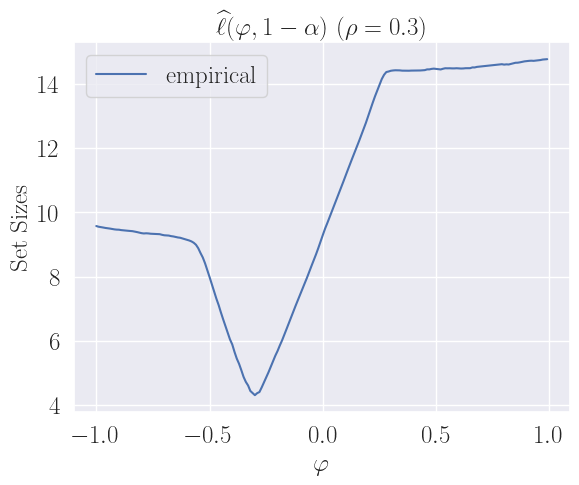

In [10]:
plt.title(r"$\widehat{\ell}(\varphi, 1-\alpha)\ (\rho = 0.3)$")
plt.xlabel(r"$\varphi$")
plt.ylabel("Set Sizes")

sns.lineplot(x=phis, y=ci_lens, label="empirical")
# sns.lineplot(x=phis, y=theory_lens, label="theory")
plt.savefig("set_sizes.png")